In [45]:
%autosave 0
import os
print(os.getcwd())

#from collections import Counter
from datetime import datetime
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


from keras import models
from keras import layers
from keras.models import load_model
from keras.callbacks import TensorBoard 

np.set_printoptions(edgeitems=3,infstr='inf',
linewidth=75, nanstr='nan', precision=8,
suppress=False, threshold=1000, formatter=None)

#np.set_printoptions(threshold=np.inf, precision=4)

Autosave disabled
C:\REPOS\playground_local_files\notebooks


In [46]:
# read output from INPUT.ipynb

inputs=np.load("nn_inputs" + '.npy')
print(inputs.shape)
num_inputAttributes=inputs.shape[1]
print(num_inputAttributes)

for row in inputs:
    print(row)

targets=np.load("nn_targets" + '.npy')
print(targets.shape)
print(targets)



(1088, 4)
4
[-0.28  0.    0.    0.  ]
[-2.00000e+00  2.97272e+02 -2.40000e-01  0.00000e+00]
[-7.900000e-01  2.720096e+02 -3.020000e+00  3.964800e-02]
[8.4000000e-01 1.5059968e+02 1.0000000e-02 9.7584000e-03]
[2.34000000e+00 2.80911744e+02 1.67000000e+00 9.43872000e-03]
[-1.05000000e+00  1.05761395e+02  1.80000000e-01  1.92389760e-02]
[  0.         -27.70288384   0.           0.        ]
[ 6.30000000e-01  3.66136929e+01 -6.40000000e-01  1.05591808e-02]
[-2.35000000e+00  2.73762954e+02 -1.71000000e+00  7.91134464e-03]
[1.73000000e+00 2.27010363e+02 1.86000000e+00 5.68907571e-03]
[ 7.90000000e-01  3.81362908e+01 -1.43000000e+00  2.32632606e-02]
[ 5.20000000e-01 -3.75911739e+01  2.07000000e+00 -8.66831324e-03]
[ 1.63000000e+00  1.10575061e+02 -4.90000000e-01 -4.57465059e-03]
[ 1.02000000e+00  1.53188049e+02  2.80000000e-01 -1.49157205e-02]
[ 5.30000000e-01  4.98624390e+01  1.05000000e+00 -3.43657638e-03]
[ 2.90000000e-01 -1.46478049e+02 -2.50000000e-01 -1.94932611e-02]
[-6.00000000e-01 -3.

[  -0.17         55.51836199    1.         -110.39386241]
[-0.39       43.0786896  -0.35       24.48491007]
[ -0.32       -12.53704832  -0.44       165.64392806]
[  0.39        14.61036134   0.19       -99.22085756]
[-2.00000000e-01 -4.22237109e+01  3.00000000e-02 -1.34328686e+02]
[  0.21       -23.56296874   1.29       -38.77494884]
[ -1.14       -15.27437499  -0.76        22.39604093]
[ -0.36       -39.85149999  -1.13        30.54883275]
[  0.65      -31.5932     -0.16       71.3830662]
[ 8.0000000e-02 -1.0830656e+02 -1.0000000e-02 -9.4797547e+01]
[-1.09       66.818752   -1.43       88.87396237]
[ -0.72       120.2470016   -0.83       163.29916989]
[ -0.57        90.02960128   1.68       146.63933591]
[-0.63       71.25568103 -0.9        93.31146873]
[ -1.46        71.37254482  -2.55       146.64917498]
[ -2.64       443.90603586  -4.73       797.31933999]
[1.93000000e+00 8.31248287e+01 1.60000000e-01 2.53855472e+02]
[  -1.49         18.49986295    1.13       -116.91562241]
[ -1.09 

### Create the Datasets

Split data into: train, dev and test sets (60-20-20).

In [47]:
def split_datasets(inputs_, targets_, split1=0.7, split2=0.5, shuffle=False):
    '''
    Splits the inputs and targets data into 3 subsets: Train, Dev and Test. 
    
    param inputs_: Numpy matrix containing the input data
    param targets_: Numpy vector containing the targets (outputs)
    param split1: Float value in [0,1] denoting the split between the Train dataset and the rest of the data, default 0.7
    param split2: Float value in [0,1] denoting the split between the Dev and Test datasets, 
    default = 0.5 for same size Dev and Test datasets.
    
    returns: A tuple of three input datasets and three target datasets
    '''

    l = len(inputs_)
    
    # Concatenate inputs_ and outputs_, shuffle and split again
    if shuffle:
        targets_ = np.reshape(targets_, (targets_.shape[0], 1))
        temp = np.concatenate((inputs_, targets_), axis=1)
        np.random.shuffle(temp)
        inputs_ = temp[:, :-1]
        targets = temp[:, -1]    
    
    
    # Split thresholds
    thr1 = int(l * split1)
    thr2 = int(thr1 + int((l - thr1) * split2))
   
    # Split data
    inputs_train = inputs_[:thr1, :]
    inputs_dev = inputs_[thr1: thr2, :]
    inputs_test = inputs_[thr2: l, :]
    
    targets_train = targets_[:thr1]
    targets_dev = targets_[thr1: thr2]
    targets_test = targets_[thr2:]

    return inputs_train, inputs_dev, inputs_test, targets_train, targets_dev, targets_test


inputs_train, inputs_dev, inputs_test, targets_train, targets_dev, targets_test = \
split_datasets(inputs, targets, split1=0.7, split2=0.5, shuffle=False)


print(targets_test)

print(type(inputs))
print(type(targets))

# Check if the length of inputs and outputs match
print(len(inputs_train), len(targets_train))
print(len(inputs_dev), len(targets_dev))
print(len(inputs_test), len(targets_test))

[-0.23 -1.19 -0.91 -0.25  0.27  0.61 -0.23  0.75 -0.05 -1.43  0.76 -0.08
  0.98 -0.51  0.08  0.18 -0.21  0.65  0.05 -0.11 -0.47  0.32 -1.81 -1.16
 -0.67  0.03 -4.08 -1.25  2.29 -0.88  2.89 -0.04 -2.06 -0.48  0.26 -0.42
 -4.43  2.95 -2.07 -1.63  1.58  2.01  1.75 -1.04 -0.38  0.64  2.64 -0.53
 -1.65 -2.78  0.   -0.9   1.72 -0.15 -3.03 -1.7   0.92 -0.48  2.06  0.01
  2.95 -0.25  0.79  1.51 -3.8   0.42 -3.05  0.74  0.16  0.95 -0.39 -2.26
 -2.27  0.45 -2.17 -1.63 -2.99 -2.21  5.84  0.38  0.08  0.77  0.46 -3.04
  4.26  1.26  1.08  0.87  0.42 -0.21 -0.94  1.71  0.15  0.71  1.03 -1.91
  0.08  0.68  1.29 -1.1  -0.81  2.2   1.37 -0.25  1.15  0.74 -0.36 -1.18
  0.14  0.13  1.46  0.08  0.09  0.61  0.19  0.03 -0.39  0.91  0.36 -0.07
  0.07 -0.29  0.83 -0.23 -0.02 -0.93 -1.13 -0.18  2.02  0.44  0.69 -0.16
  0.76  0.34  0.12  0.06  1.42 -2.5  -0.07  0.71 -0.63  0.34  0.78  1.29
  0.25  0.6  -0.05  0.59  0.19 -0.56  0.69 -0.21  0.46 -0.1   0.3  -0.05
  0.02  0.22  1.32 -0.23  0.21  0.34  0.19 -0.81]
<

Now the following method will create a Keras model with 2 hidden layers. 2 because we only have ~900 examples and creating an even bigger model would be waste of time. Maybe even this one is too big for the data we have, but still it's small enough so we can get results quickly.

One comment on the `compile` method below and the metrics choice.. 
The target values (price change of the DOW30 index) come from a continuous distribution (for example they can be anywhere from -10 to + 10, just to illustrate). For this reason, the following NN maps the input data to a continuous target value, solving the problem as a "regression". So, since it's a regression problem, we use the "mean squared error" (mse) loss function, and the "mean absolute error" (mae) as another metric to be observed. On the other side, in classification problems we could use metrics such as "accuracy".

In [48]:
def create_regression_model(nodes=[64, 16], dropout_rate=0):
    '''
    Creates a Sequential Keras model with hidden layer sizes as specified in `nodes` and dropout rates as in `dropout_rate`.
    
    param nodes: A list of integers specifying the number of nodes in hidden layers. Default: [64, 16]
    param dropout_rate: A float denoting the dropout rate (regularization) to be used at each layer. Default: 0
    
    returns: A Sequential Keras model
    '''
    model = models.Sequential()
    model.add(layers.Dense(nodes[0], activation='relu', input_shape=(num_inputAttributes,)))
    model.add(layers.Dropout(dropout_rate))
    
    if len(nodes) > 1:
        for num_nodes in nodes[1:]:
            model.add(layers.Dense(num_nodes, activation='relu'))
            model.add(layers.Dropout(dropout_rate))
    model.add(layers.Dense(1))
    print(model.summary())

    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    
    # Assign a descriptive name to the model
    model.name = str(num_inputAttributes) + '-'
    
    for node in nodes:
        model.name += str(node) + '-'
    model.name += '1, Dropout: ' + str(dropout_rate)
    print('Model name:', model.name)
    
    # The TensorBoard callback is not needed at the moment, because the following plotting function will replace it. 
    # To use TensorBoard I'll have to adjust the security settings of the GCP machine, and at this moment it is not 
    # needed because the plotting function below is enough to do the work.
    # tb_callback = TensorBoard(log_dir='./Graph/', histogram_freq=0, write_graph=True, write_images=True)

    return model

In [49]:
def plot_history(hist, ylim=2):
    '''
    Plots the training and dev performance over epochs. We'll use this function as a replacement to TensorBoard 
    (because it would need additional settings in my GCP instance).
    
    param hist: A Keras history object, returned from calling the `fit()` method on the model.
    param ylim: Float (>0) to specify the upper range of y-axis in the plots.
    
    returns: /
    '''
    
    train_loss = hist.history['loss']
    dev_loss = hist.history['val_loss']
    train_mae = hist.history['mean_absolute_error']
    dev_mae = hist.history['val_mean_absolute_error']
    epochs = range(1, len(train_loss) + 1)
    
    plt.plot(epochs, train_loss, label='Train loss')
    plt.plot(epochs, dev_loss, label='Dev loss')
    plt.legend()
    plt.ylim([0, ylim])
    plt.xlabel('Epoch #')
    plt.title("Model: %s" % hist.model.name)
    plt.show()
    
    plt.figure()
    plt.plot(epochs, train_mae, label='Train mae')
    plt.plot(epochs, dev_mae, label='Dev mae')
    plt.title("Model: %s" % hist.model.name)
    plt.xlabel('Epoch #')
    plt.legend()
    plt.ylim([0, ylim])
    plt.show()

In [50]:
model_300 = create_regression_model([64, 16], dropout_rate=0.10)
history_300 = model_300.fit(inputs_train, targets_train, 
                            epochs=300, 
                            batch_size=16, 
                            validation_data=(inputs_dev, targets_dev)
                           )

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 64)                320       
_________________________________________________________________
dropout_5 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 16)                1040      
_________________________________________________________________
dropout_6 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 17        
Total params: 1,377
Trainable params: 1,377
Non-trainable params: 0
_________________________________________________________________
None
Model name: 4-64-16-1, Dropout: 0.1
Train on 761 samples, validate on 163 samples
Epoch 1/300
761/761 [==============================] 

761/761 [==============================] - 0s 62us/step - loss: 0.9196 - mean_absolute_error: 0.6789 - val_loss: 1.1588 - val_mean_absolute_error: 0.7839
Epoch 44/300
761/761 [==============================] - 0s 60us/step - loss: 1.0244 - mean_absolute_error: 0.6856 - val_loss: 1.1575 - val_mean_absolute_error: 0.7846
Epoch 45/300
761/761 [==============================] - 0s 59us/step - loss: 1.4797 - mean_absolute_error: 0.7270 - val_loss: 1.1671 - val_mean_absolute_error: 0.7897
Epoch 46/300
761/761 [==============================] - 0s 62us/step - loss: 0.9817 - mean_absolute_error: 0.6833 - val_loss: 1.1623 - val_mean_absolute_error: 0.7860
Epoch 47/300
761/761 [==============================] - 0s 63us/step - loss: 1.1985 - mean_absolute_error: 0.7022 - val_loss: 1.1607 - val_mean_absolute_error: 0.7845
Epoch 48/300
761/761 [==============================] - 0s 59us/step - loss: 0.8184 - mean_absolute_error: 0.6527 - val_loss: 1.1591 - val_mean_absolute_error: 0.7845
Epoch 49/30

761/761 [==============================] - 0s 62us/step - loss: 0.8839 - mean_absolute_error: 0.6531 - val_loss: 1.1585 - val_mean_absolute_error: 0.7845
Epoch 93/300
761/761 [==============================] - 0s 60us/step - loss: 0.7971 - mean_absolute_error: 0.6377 - val_loss: 1.1579 - val_mean_absolute_error: 0.7843
Epoch 94/300
761/761 [==============================] - 0s 60us/step - loss: 0.7957 - mean_absolute_error: 0.6393 - val_loss: 1.1583 - val_mean_absolute_error: 0.7844
Epoch 95/300
761/761 [==============================] - 0s 63us/step - loss: 0.8656 - mean_absolute_error: 0.6561 - val_loss: 1.1588 - val_mean_absolute_error: 0.7847
Epoch 96/300
761/761 [==============================] - 0s 59us/step - loss: 0.8277 - mean_absolute_error: 0.6520 - val_loss: 1.1608 - val_mean_absolute_error: 0.7861
Epoch 97/300
761/761 [==============================] - 0s 62us/step - loss: 0.8229 - mean_absolute_error: 0.6452 - val_loss: 1.1648 - val_mean_absolute_error: 0.7883
Epoch 98/30

Epoch 141/300
761/761 [==============================] - 0s 62us/step - loss: 0.8238 - mean_absolute_error: 0.6517 - val_loss: 1.1722 - val_mean_absolute_error: 0.7941
Epoch 142/300
761/761 [==============================] - 0s 60us/step - loss: 0.7843 - mean_absolute_error: 0.6376 - val_loss: 1.1606 - val_mean_absolute_error: 0.7864
Epoch 143/300
761/761 [==============================] - 0s 60us/step - loss: 0.8149 - mean_absolute_error: 0.6428 - val_loss: 1.1618 - val_mean_absolute_error: 0.7872
Epoch 144/300
761/761 [==============================] - 0s 60us/step - loss: 0.7845 - mean_absolute_error: 0.6385 - val_loss: 1.1657 - val_mean_absolute_error: 0.7884
Epoch 145/300
761/761 [==============================] - 0s 60us/step - loss: 0.7689 - mean_absolute_error: 0.6344 - val_loss: 1.1737 - val_mean_absolute_error: 0.7930
Epoch 146/300
761/761 [==============================] - 0s 59us/step - loss: 0.7877 - mean_absolute_error: 0.6414 - val_loss: 1.1668 - val_mean_absolute_error:

Epoch 190/300
761/761 [==============================] - 0s 62us/step - loss: 0.7633 - mean_absolute_error: 0.6350 - val_loss: 1.1872 - val_mean_absolute_error: 0.8027
Epoch 191/300
761/761 [==============================] - 0s 60us/step - loss: 0.7904 - mean_absolute_error: 0.6428 - val_loss: 1.1568 - val_mean_absolute_error: 0.7850
Epoch 192/300
761/761 [==============================] - 0s 59us/step - loss: 0.7861 - mean_absolute_error: 0.6365 - val_loss: 1.1639 - val_mean_absolute_error: 0.7875
Epoch 193/300
761/761 [==============================] - 0s 62us/step - loss: 0.7914 - mean_absolute_error: 0.6461 - val_loss: 1.1621 - val_mean_absolute_error: 0.7872
Epoch 194/300
761/761 [==============================] - 0s 59us/step - loss: 0.7816 - mean_absolute_error: 0.6402 - val_loss: 1.1540 - val_mean_absolute_error: 0.7847
Epoch 195/300
761/761 [==============================] - 0s 59us/step - loss: 0.7731 - mean_absolute_error: 0.6372 - val_loss: 1.1640 - val_mean_absolute_error:

Epoch 239/300
761/761 [==============================] - 0s 62us/step - loss: 0.7863 - mean_absolute_error: 0.6309 - val_loss: 1.1560 - val_mean_absolute_error: 0.7857
Epoch 240/300
761/761 [==============================] - 0s 62us/step - loss: 0.7391 - mean_absolute_error: 0.6239 - val_loss: 1.1505 - val_mean_absolute_error: 0.7841
Epoch 241/300
761/761 [==============================] - 0s 59us/step - loss: 0.7366 - mean_absolute_error: 0.6180 - val_loss: 1.1538 - val_mean_absolute_error: 0.7854
Epoch 242/300
761/761 [==============================] - 0s 63us/step - loss: 0.7651 - mean_absolute_error: 0.6354 - val_loss: 1.1541 - val_mean_absolute_error: 0.7852
Epoch 243/300
761/761 [==============================] - 0s 59us/step - loss: 0.7382 - mean_absolute_error: 0.6239 - val_loss: 1.1549 - val_mean_absolute_error: 0.7860
Epoch 244/300
761/761 [==============================] - 0s 60us/step - loss: 0.7241 - mean_absolute_error: 0.6201 - val_loss: 1.1510 - val_mean_absolute_error:

Epoch 288/300
761/761 [==============================] - 0s 60us/step - loss: 0.6712 - mean_absolute_error: 0.5990 - val_loss: 1.1480 - val_mean_absolute_error: 0.7835
Epoch 289/300
761/761 [==============================] - 0s 60us/step - loss: 0.6741 - mean_absolute_error: 0.5992 - val_loss: 1.1436 - val_mean_absolute_error: 0.7882
Epoch 290/300
761/761 [==============================] - 0s 59us/step - loss: 0.6691 - mean_absolute_error: 0.5984 - val_loss: 1.1295 - val_mean_absolute_error: 0.7780
Epoch 291/300
761/761 [==============================] - 0s 59us/step - loss: 0.6460 - mean_absolute_error: 0.5903 - val_loss: 1.1550 - val_mean_absolute_error: 0.7928
Epoch 292/300
761/761 [==============================] - 0s 60us/step - loss: 0.6908 - mean_absolute_error: 0.6045 - val_loss: 1.1411 - val_mean_absolute_error: 0.7840
Epoch 293/300
761/761 [==============================] - 0s 60us/step - loss: 0.6616 - mean_absolute_error: 0.5924 - val_loss: 1.1511 - val_mean_absolute_error:

And one last plot of the loss function:

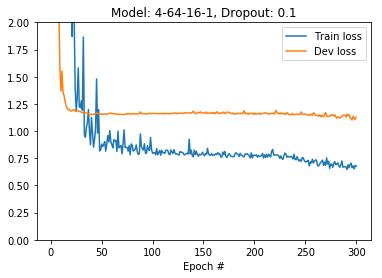

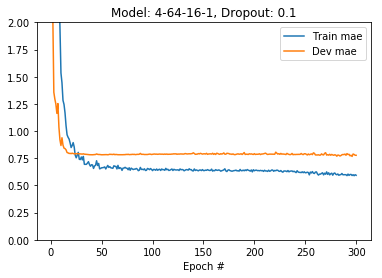

In [51]:
plot_history(history_300)

## Test

Now after many iterations of training and looking at the performance on the Dev (validation) set, let's do a final test on the Test set.

In [52]:
test_results_300 = model_300.evaluate(inputs_test, targets_test, verbose=1)
print(test_results_300)

164/164 [==============================] - 0s 30us/step
[1.932178185480397, 0.9446043074131012]


From: Deep Learning with Python by Francois Chollet: 

"If it turns out that performance on the test set is significantly worse than the performance measured on the validation data, this may mean that you began overfitting to the validation data while tuning the parameters of the model. In this case, you may want to switch to a more reliable evaluation protocol (such as iterated K-fold validation)."

In [53]:
# saving the trained model to be used later...
model_300.save("./INDEX_NN.h5")

# bringing it back to make sure it works as expected...
del model_300
model_300 = load_model("./INDEX_NN.h5")


In [54]:
print(inputs_test.shape)

(164, 4)


## Performance Analysis

Get predictions using the latest model.

In [55]:
pred = model_300.predict(inputs_test)
print("pred is type:  ", type(pred))
print("pred shape is:  ", pred.shape)
#print(pred[:10])

print(pred)

pred is type:   <class 'numpy.ndarray'>
pred shape is:   (164, 1)
[[-0.02299907]
 [-0.06254813]
 [-0.09166802]
 [ 0.0465953 ]
 [ 0.14239258]
 [ 0.06613578]
 [ 0.06613578]
 [ 0.06613578]
 [ 0.06613578]
 [ 0.07529565]
 [ 0.06613578]
 [ 0.06613578]
 [ 0.06613578]
 [ 0.06613578]
 [ 0.06613578]
 [ 0.06613578]
 [ 0.0936497 ]
 [ 0.18951035]
 [ 0.06613578]
 [ 0.09998626]
 [ 0.04478173]
 [ 0.43948835]
 [ 0.06613578]
 [ 0.06613578]
 [ 0.06613578]
 [ 0.06613578]
 [-0.06813578]
 [-0.00836033]
 [ 0.06613578]
 [ 0.17869794]
 [ 0.20006363]
 [ 0.09623572]
 [ 0.06613578]
 [ 0.4011249 ]
 [ 0.22560264]
 [-0.2010272 ]
 [ 0.06613578]
 [ 0.06613578]
 [ 0.06613578]
 [ 0.7232252 ]
 [ 0.06613578]
 [ 0.06613578]
 [ 0.06613578]
 [ 0.06613578]
 [ 0.12532495]
 [ 0.06613578]
 [ 0.06613578]
 [ 0.20183295]
 [ 0.06613578]
 [ 0.17394991]
 [ 0.06613578]
 [ 0.06613578]
 [ 0.06613578]
 [ 0.02375197]
 [ 0.06613578]
 [ 0.06613578]
 [ 0.27810192]
 [ 0.073411  ]
 [ 0.11708683]
 [ 0.05510502]
 [ 0.06613578]
 [ 0.22792219]
 [ 0

In [56]:
# Write out the test targets (actuals)  and predictions
 
np.save("nn_predictions", pred)
np.save("nn_actuals", targets_test)


In [57]:
def calc_opt_threshold(predictions, actuals):
    
    # Calculate optimal positive (buy) threshold
    buy_threshold = 0.0
    max_buy_profit = 0.0
    movement=0.0
    
    for threshold in np.arange (0 , 1,0.01):
        for i, prediction in enumerate(predictions):
            if predictions[i] > threshold:
                movement += actuals[i]
                #print("#:  %s  Prediction:  %s Threshold:  %s    Adding Actual:  %s    Movement:  %.2f"  % (i, predictions[i], threshold, actuals[i], movement) )
            
        if movement > max_buy_profit:
            max_buy_profit = movement
            buy_threshold = threshold
            movement=0
                
    print("Buy Threshold:  %s: " % buy_threshold)
    print("Resulting in a profit of %.2f %%" % max_buy_profit)
    print("---------------")    
    # Calculate optimal negative (sell) prediction threshold
    sell_threshold = 0.0
    max_sell_profit = 0.0
    movement=0.0
    
    for threshold in np.arange (0 , -1, -0.01):
        for i, prediction in enumerate(predictions):
            if predictions[i] < threshold:
                movement += actuals[i]
                #print("#: %s   Prediction: %s  Threshold: %s    Adding Actual:  %s  movement:  %.2f"  % (i, predictions[i], threshold, actuals[i], movement) )
            
        if movement < max_sell_profit:
            max_sell_profit = movement
            sell_threshold = threshold
            movement=0
                
    print("Sell Threshold:  %s: " % sell_threshold)
    print("Resulting in a profit of %.2f %%" % abs(max_sell_profit) )
    print("---------------")  
    
    print("Number of samples:  %d" % len(predictions))

    return buy_threshold, sell_threshold

In [58]:
buy_threshold, sell_threshold = calc_opt_threshold(pred,targets_test)


Buy Threshold:  0.4: 
Resulting in a profit of 83.27 %
---------------
Sell Threshold:  -0.05: 
Resulting in a profit of 29.97 %
---------------
Number of samples:  164


Now apply the category thresholds to get the predicted categories.

In [59]:
# Define the categories
THRESHOLDS = [ {'lower_bound': buy_threshold, 'upper_bound': np.inf, 'category': 1},
               {'lower_bound': -np.inf, 'upper_bound': sell_threshold, 'category': -1},
               {'lower_bound': sell_threshold, 'upper_bound': buy_threshold, 'category': 0}
             ]

# BINS are needed for the plotting of histogram later on
BINS =[-1.25,-0.75,-0.25,0.25, 0.75, 1.25]

In [60]:
def apply_thresholds(predictions):
    '''
    Digitises the predictions into the predefined categories. Upper bound inclusive.
    
    param predictions: A numpy array of predictions for price change % in the range [-inf, +inf]
    
    returns: A numpy array of categories {-1,0,+1} based upon prediction as compared to optimized thresholds.
    '''
    
    #pred_categories = np.ones_like(predictions) * 10
    
    pred_categories = np.zeros_like(predictions)
    
    for i, prediction in enumerate(predictions):
        for bound in THRESHOLDS:        
            if (prediction > bound['lower_bound']) and (prediction <= bound['upper_bound']):
                pred_categories[i] = bound['category']
                continue

    return pred_categories

Now apply the thresholds to both predicted and target arrays.

In [61]:
pred_cat = apply_thresholds(pred)
target_cat = apply_thresholds(targets_test)

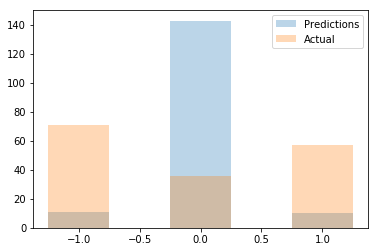

In [62]:
plt.hist(pred_cat, BINS, ALPHA=0.3, label='Predictions')
plt.hist(target_cat, BINS, ALPHA=0.3,label='Actual')
plt.legend()
plt.show()

So the two distributions differ quite a lot, which was expected given the test loss. While the true targets are mainly placed in categories -3 and 3, the predictions are quite central in categories 0, 1.

<font color='red'>Another important thing is that we'll have to modify the thresholds so the distribution of data is more uniform - in such way that we don't have the two peaks in classes -3 and 3.</font>

Let's plot the confusion matrix.

In [63]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(target_cat, pred_cat, labels=[-1,0,1])

In [64]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion Matrix',
                          cmap=plt.cm.Blues):
    """
    Mihajlo: I took this function from scikit-learn docs online: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    import itertools
    
    tp=cm[2:3,2:3]
    tn = cm[0:1,0:1]
    fp= cm[0:1,2:3]
    fn = cm [2:3,0:1]

    tot=np.sum(cm)
    
    pct_pos=(tp/(tp+fp)) * 100
    pct_neg=(tn/(tn+fn)) * 100
    
    print ("Percent Long Correct: %d%%   Percent Short Correct:  %d%%" % (pct_pos, pct_neg))
    print("Total Long:  %d     Total Short:  %d      Total Samples:  %d" % ((tp+fp), (tn + fn), tot ) )
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized Confusion Matrix")
    else:
        print('Confusion Matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Plot confusion matrix WITHOUT normalization:

Percent Long Correct: 57%   Percent Short Correct:  70%
Total Long:  7     Total Short:  10      Total Samples:  164
Confusion Matrix, without normalization
[[ 7 61  3]
 [ 1 32  3]
 [ 3 50  4]]


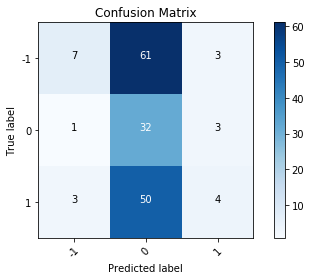

In [65]:
#plot_confusion_matrix(cm, classes=[-3, -2, -1, 0, 1, 2, 3])
plot_confusion_matrix(cm, classes=[-1, 0, 1])

Plot confusion matrix WITH normalization:

Percent Long Correct: 57%   Percent Short Correct:  70%
Total Long:  7     Total Short:  10      Total Samples:  164
Normalized Confusion Matrix
[[0.09859155 0.85915493 0.04225352]
 [0.02777778 0.88888889 0.08333333]
 [0.05263158 0.87719298 0.07017544]]


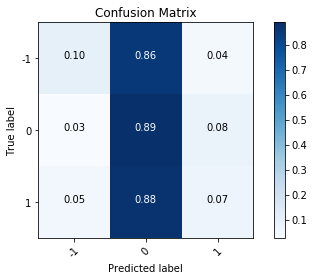

In [66]:
plot_confusion_matrix(cm, classes=[-1, 0, 1], normalize=True)